In [1]:
import pandas as pd
#Data upload
df=pd.read_csv("C:\\Users\\user\\AppData\\Local\\Temp\\294b8862-6243-4d5e-859a-f8f08419b669_EDA1 (1).zip.669\\EDA1\\Cardiotocographic.csv")
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Handling missing values (e.g., using mean imputation for numerical columns)
df.fillna(df.mean(), inplace=True)

# Verify if missing values are handled
missing_values_after = df.isnull().sum()
# Check the column names in the DataFrame
print(df.columns)



Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')


In [6]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Handle missing values, for example, by filling with the mean (numerical columns)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Verify if missing values are handled
missing_values_after = df.isnull().sum()
print("Missing values after handling:\n", missing_values_after)



Missing values per column:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64
Missing values after handling:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [7]:
# Convert 'Width', 'Tendency', and 'NSP' to categorical if they are categorical
df['Width'] = df['Width'].astype('category')
df['Tendency'] = df['Tendency'].astype('category')
df['NSP'] = df['NSP'].astype('category')

# Check data types
print(df.dtypes)


LB           float64
AC           float64
FM           float64
UC           float64
DL           float64
DS           float64
DP           float64
ASTV         float64
MSTV         float64
ALTV         float64
MLTV         float64
Width       category
Tendency    category
NSP         category
dtype: object


In [8]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_zscores = df[numerical_columns].apply(zscore)

# Find outliers (where Z-score > 3 or < -3)
outliers = (df_zscores.abs() > 3).any(axis=1)
print("Number of outliers:", outliers.sum())

# Optionally, remove outliers
df_cleaned = df[~outliers]


Number of outliers: 233


In [9]:
# Statistical summary
summary = df.describe(include=['float64', 'int64'])
print(summary)


                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

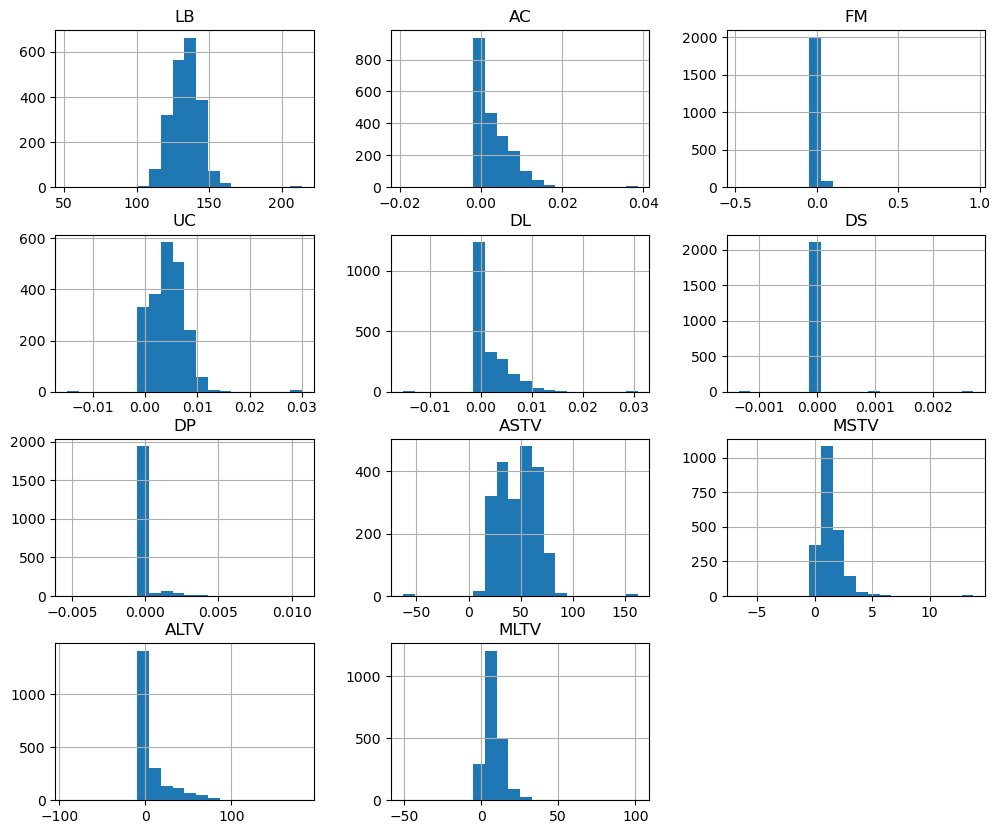

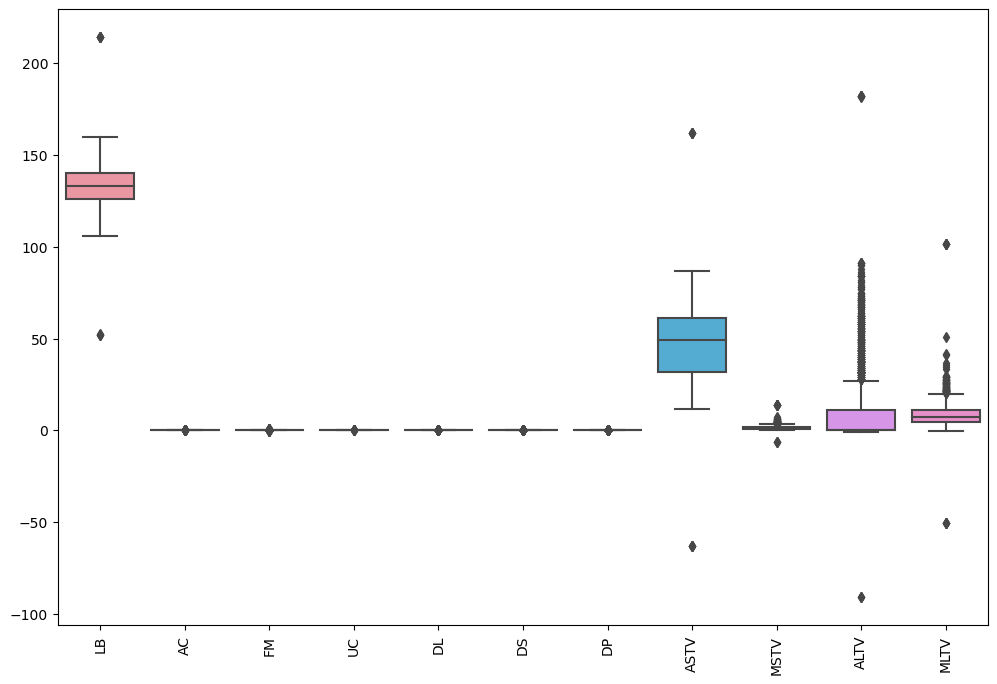

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df[numerical_columns].hist(figsize=(12, 10), bins=20)
plt.show()

# Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)
plt.show()


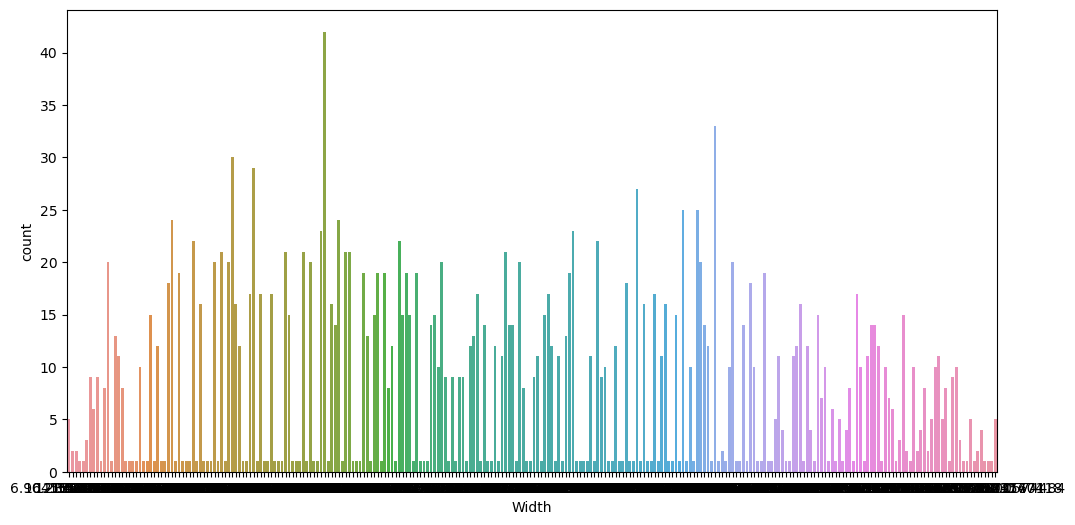

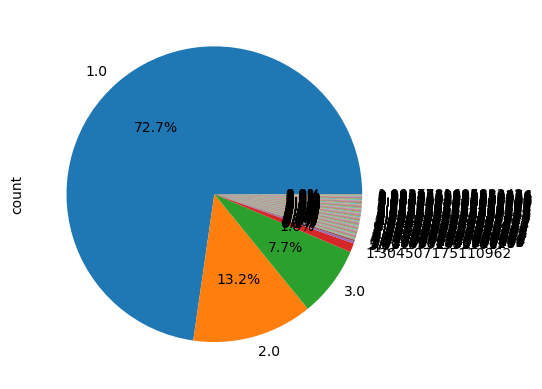

In [11]:
# Bar charts for categorical columns
plt.figure(figsize=(12, 6))
sns.countplot(x='Width', data=df)
plt.show()

# Pie chart for 'NSP'
df['NSP'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


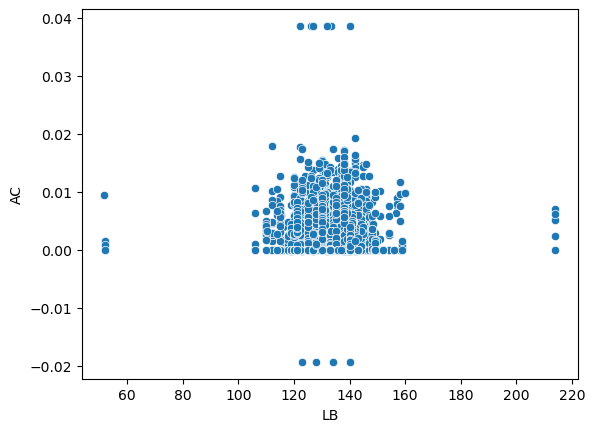

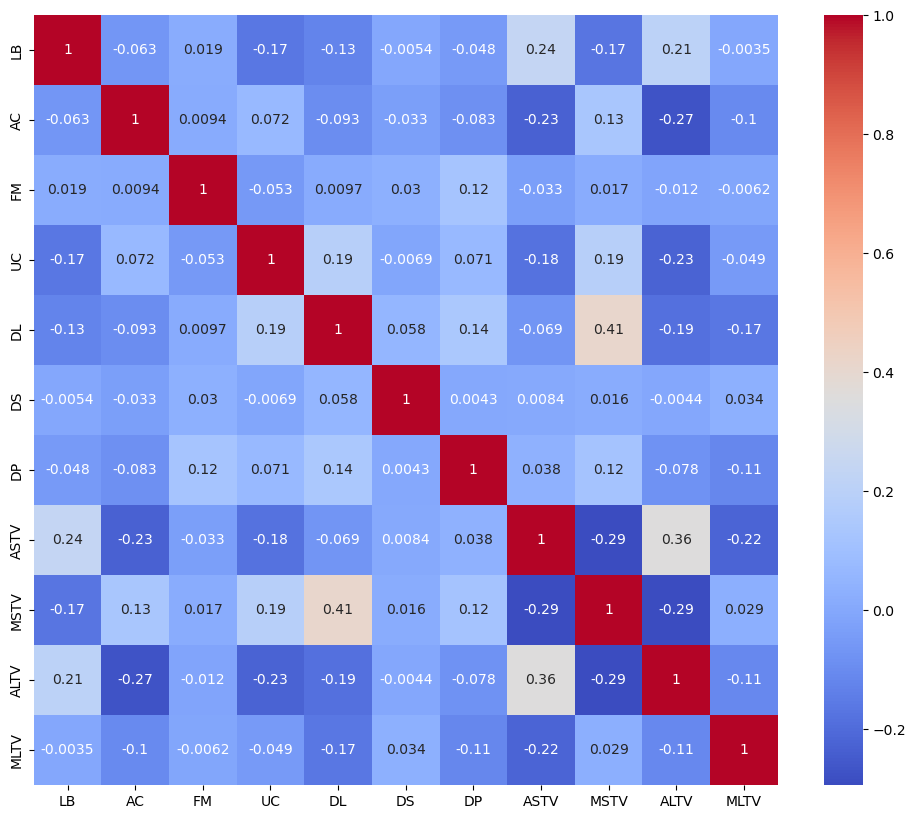

In [12]:
# Scatter plots
sns.scatterplot(x='LB', y='AC', data=df)
plt.show()

# Correlation heatmap
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


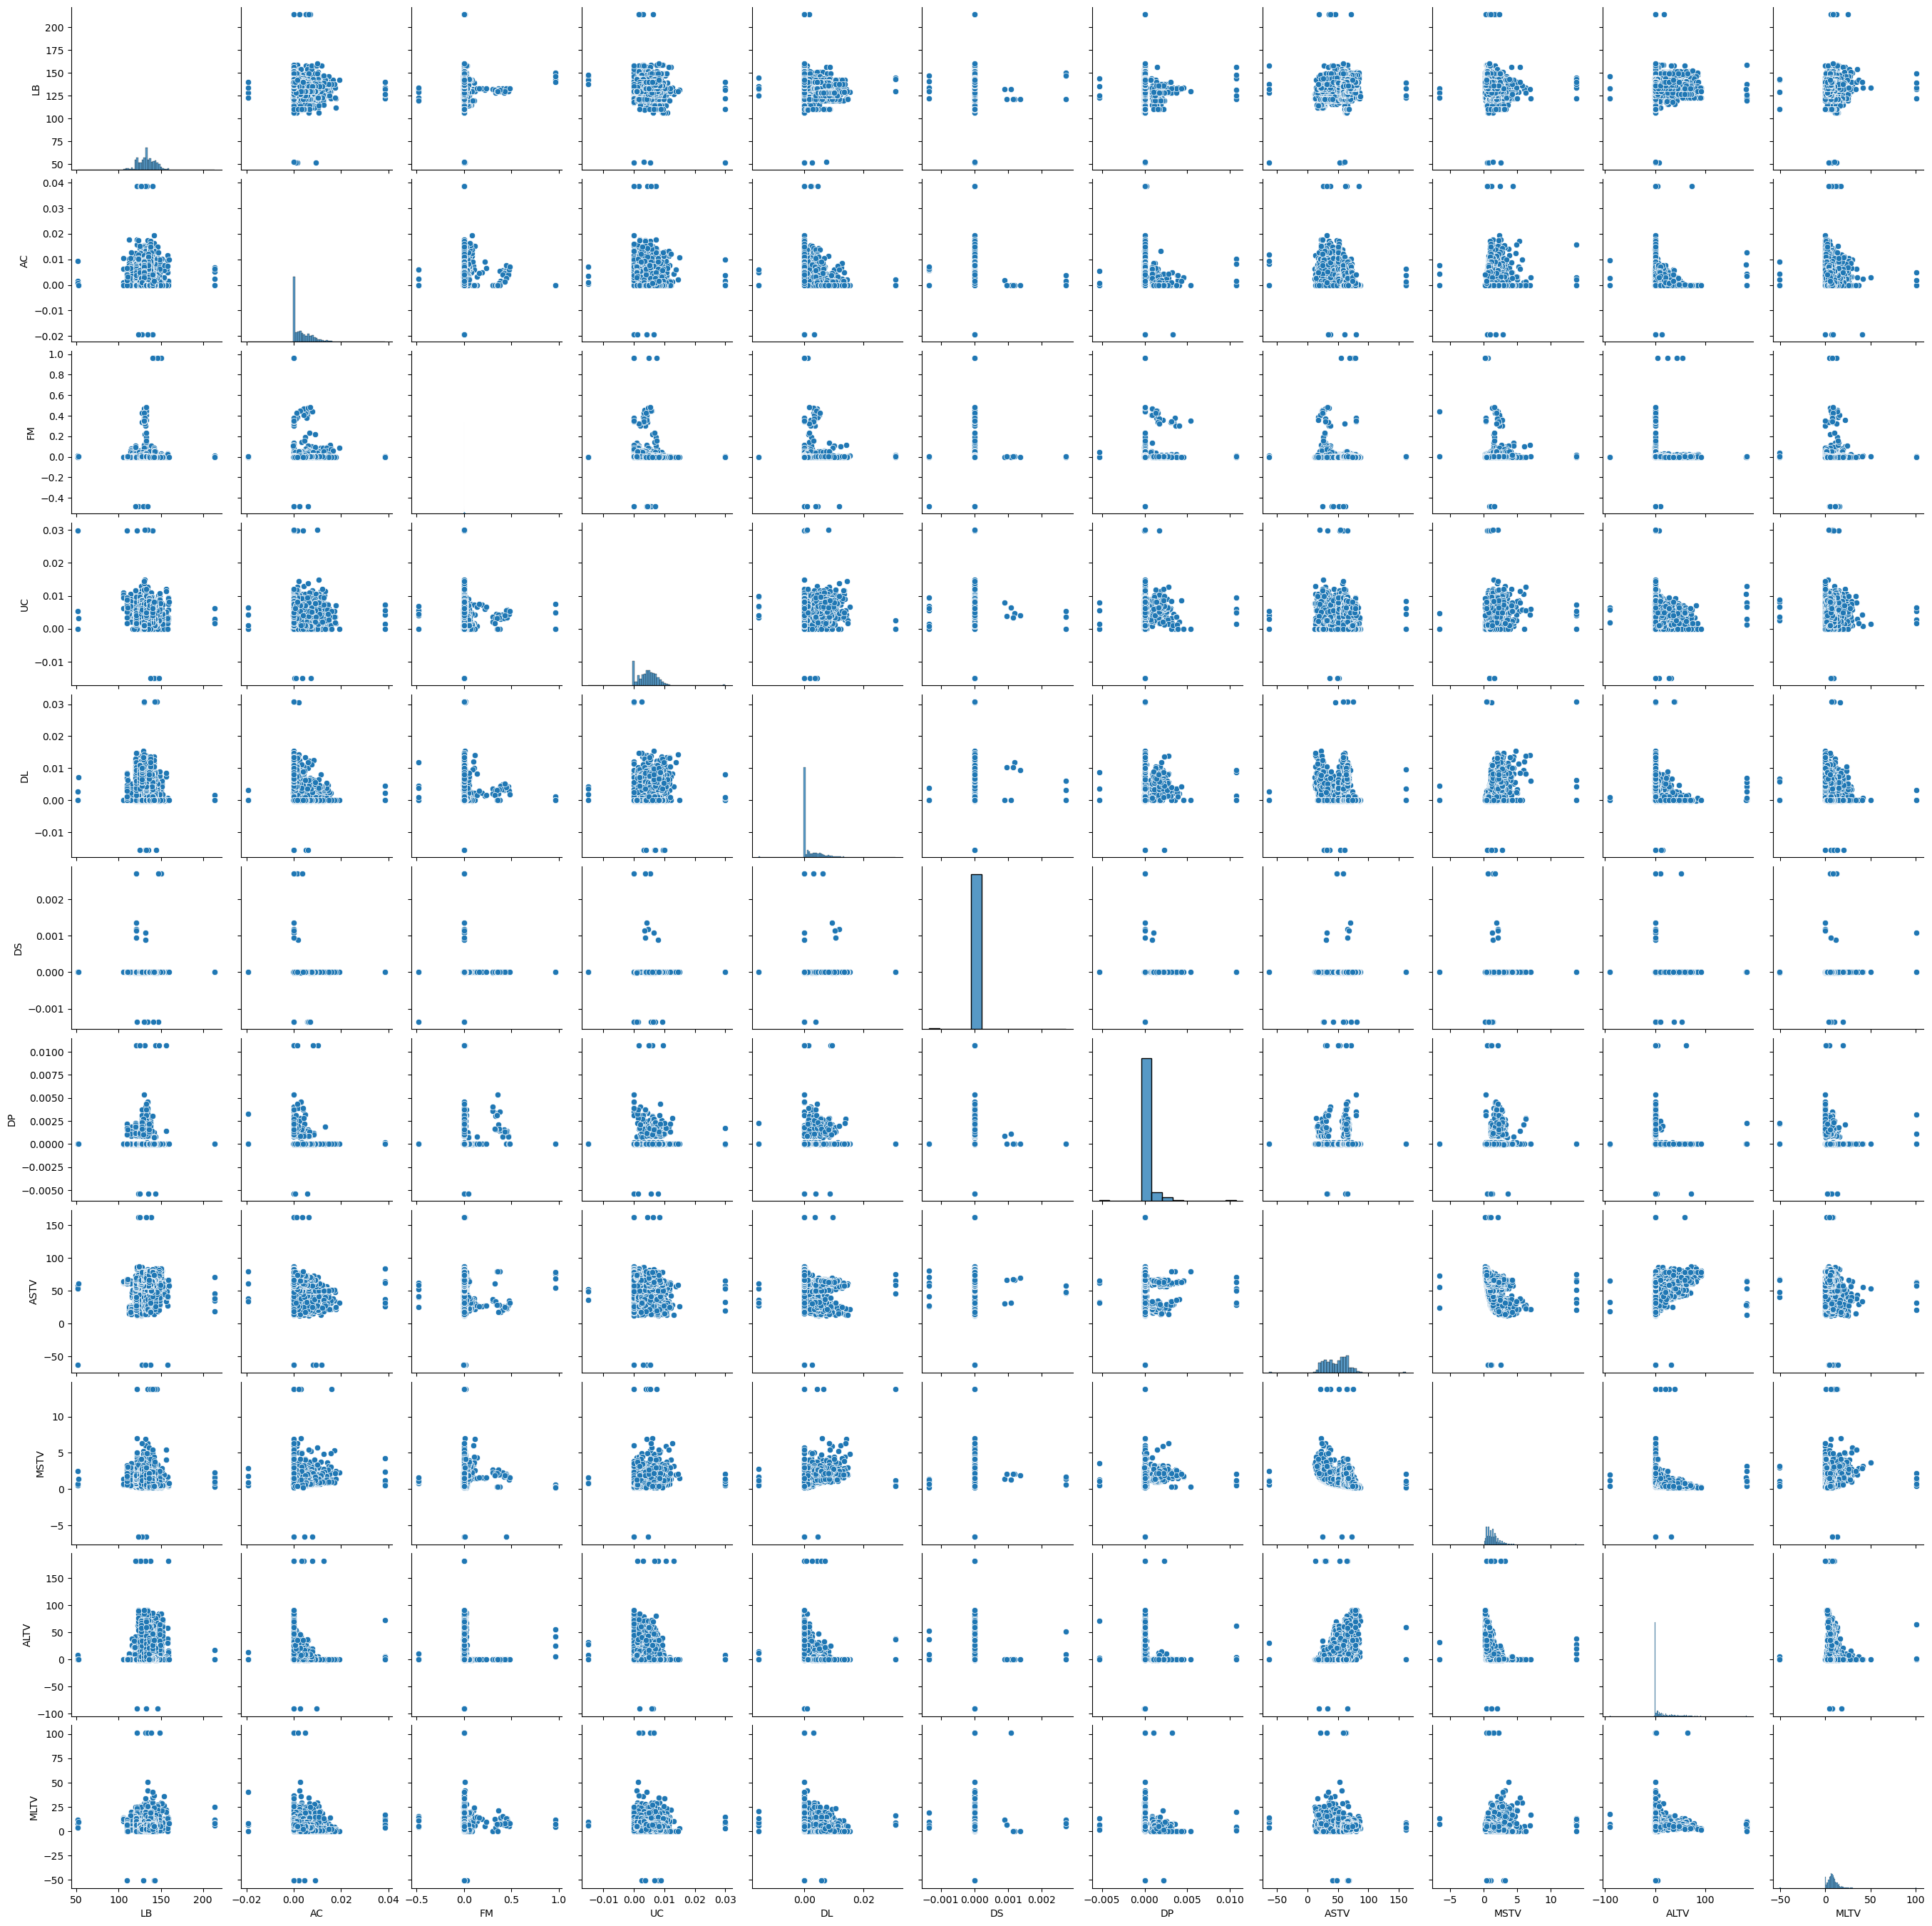

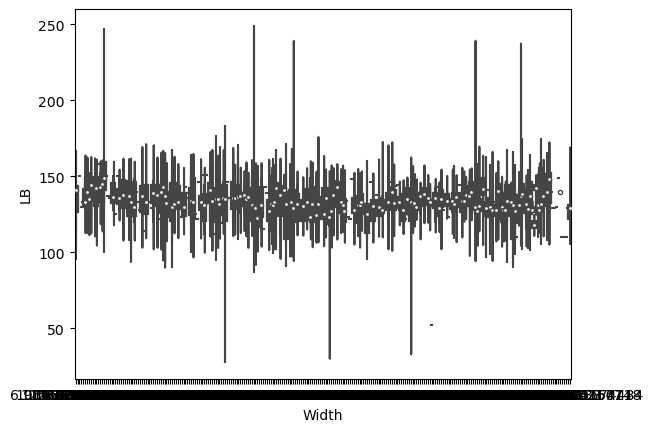

In [13]:
# Pair plots
sns.pairplot(df[numerical_columns])
plt.show()

# Violin plots
sns.violinplot(x='Width', y='LB', data=df)
plt.show()


In [14]:
print(corr_matrix)


            LB        AC        FM        UC        DL        DS        DP  \
LB    1.000000 -0.062839  0.018776 -0.166201 -0.126536 -0.005438 -0.047724   
AC   -0.062839  1.000000  0.009432  0.071863 -0.093196 -0.033101 -0.083277   
FM    0.018776  0.009432  1.000000 -0.053226  0.009718  0.029899  0.121274   
UC   -0.166201  0.071863 -0.053226  1.000000  0.190128 -0.006922  0.070501   
DL   -0.126536 -0.093196  0.009718  0.190128  1.000000  0.058430  0.144940   
DS   -0.005438 -0.033101  0.029899 -0.006922  0.058430  1.000000  0.004285   
DP   -0.047724 -0.083277  0.121274  0.070501  0.144940  0.004285  1.000000   
ASTV  0.241857 -0.230439 -0.032691 -0.181161 -0.069361  0.008425  0.038117   
MSTV -0.169561  0.133649  0.017055  0.189406  0.410102  0.016077  0.119250   
ALTV  0.210446 -0.271041 -0.011936 -0.227304 -0.186967 -0.004392 -0.077654   
MLTV -0.003457 -0.104875 -0.006237 -0.049351 -0.165198  0.034349 -0.114084   

          ASTV      MSTV      ALTV      MLTV  
LB    0.241857 -

In [ ]:
Conclusion:
1. Data Cleaning and Preparation
2.Statistical Summary 
3.Data Visualization
    Histograms and Boxplots
    Bar Charts and Pie Charts
    Scatter Plots and Correlation Heatmaps
    Advanced Visualization
4. Pattern Recognition and Insights
    correlation